# Telco Customer Churn

### Customer Churn -- the loss of clients or customers. 

### Prediction of Customers Churn and Statistical Analysis.  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### 1. Dataset Reading and Data Pre-processing 

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape 

(7043, 21)

In [4]:
df.head()     
# Displaying first 20 rows for initial observations

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1.1 Cheking Missing Data 

In [5]:
df.isnull().any().any(), df.shape  

(False, (7043, 21))

::: No Missing data in dataset 

### 1.2 Checking Features Names 

In [6]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


#### Details of Features: 
1. customerID: Customer ID
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No)
6. tenure: Number of months the customer has stayed with the company
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No)

### 1.3 Checking attributes of Features (Categorical/Numerical) 

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


## 2. EDA (Exploratory Data Analysis) and Statistical Analysis


In [8]:
df.describe(include=["O"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,2123-VSCOT,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### 2.1 Comparison of Churn and No-Churn Customers 

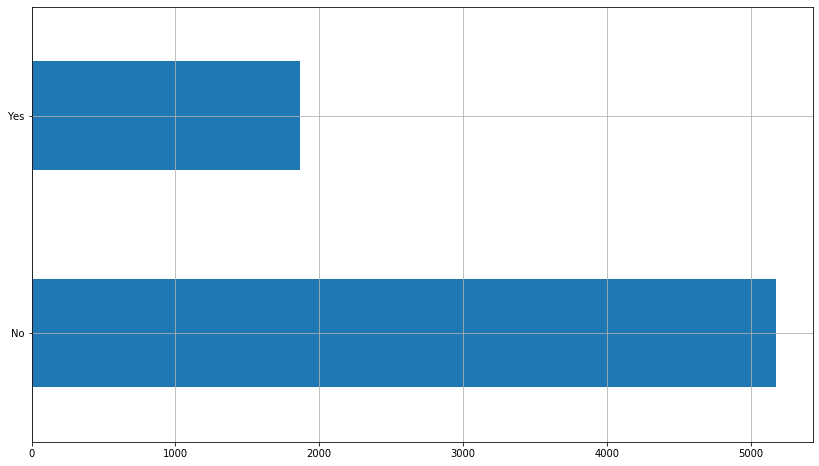

In [9]:
# plt.figure(figsize= (8,4))
plt.figure(figsize=(14,8))
df['Churn'].value_counts().plot(kind = 'barh',grid = True)
plt.show()

::: Dataset is not balanced since Churn and No-churn values are around 25% and 75% respectively 

### 2.3 Comparison of Gender in Churned and Retained Customers 

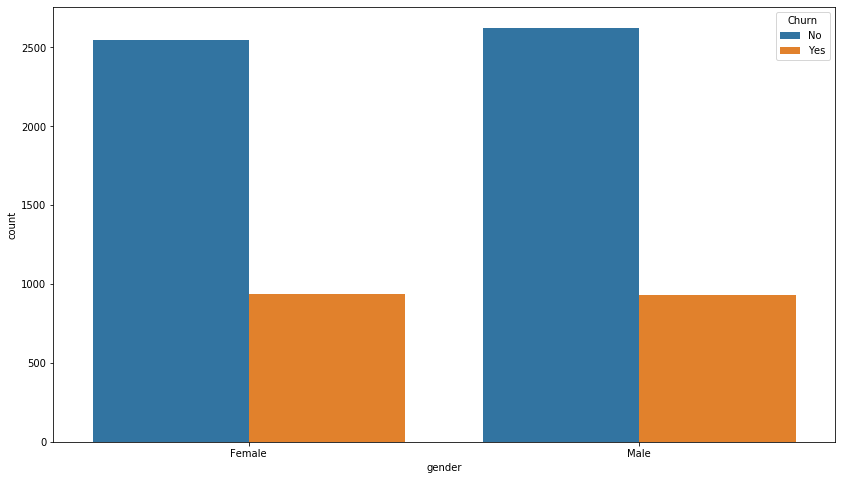

In [10]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="gender", hue="Churn", data=df)
plt.show()

::: Gender is not playing any role for retention of customers 

### 2.4 Comparison of Senior Citizens in Churned and Retained Customers 

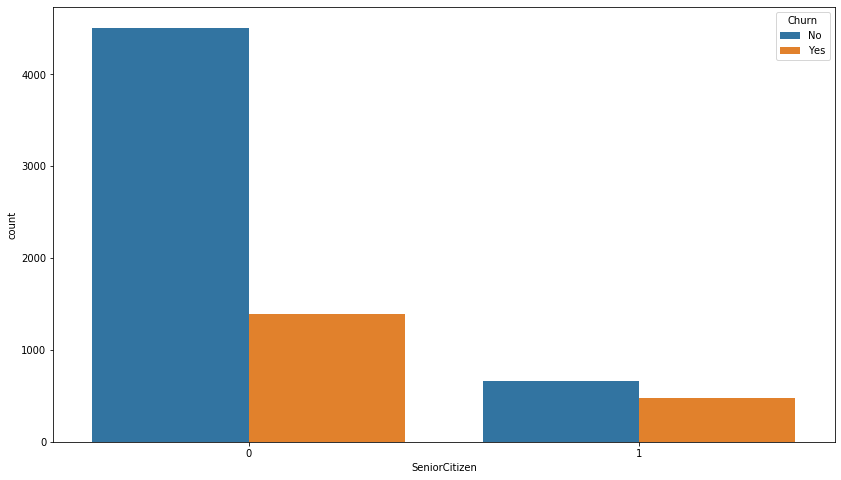

In [11]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.show()

::: Senior Citizens are more likely to Churn as compared to Non-Seniors

### 2.5 Impact of Tenure Duration at Churn Rate  

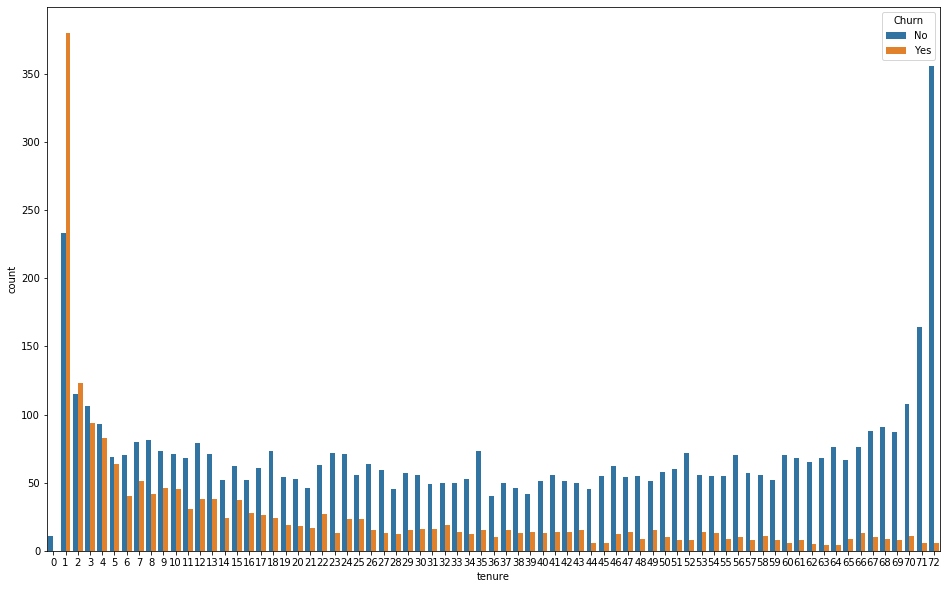

In [13]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

::: These stats are refelecting that the more duration a customer spent -- better loyal to services as Churn Rate is decreasing with increased tenure duration  

### 2.6 MonthlyCharges and Relationship with Churn Rate

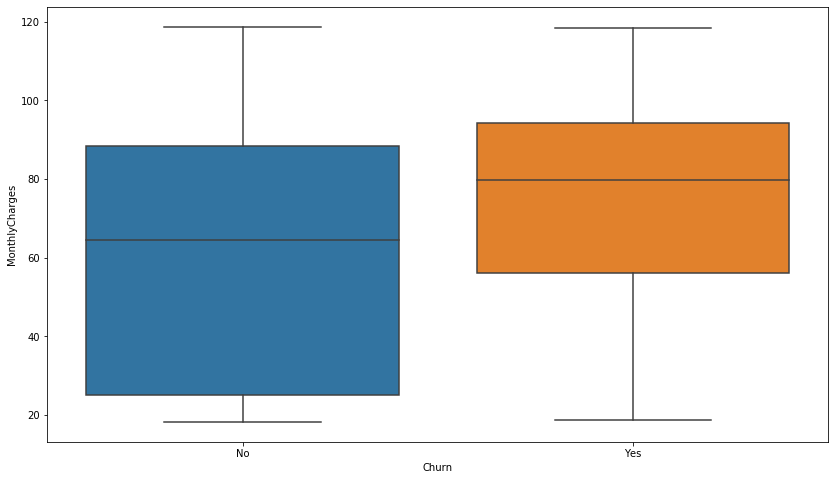

In [18]:
fig = plt.figure(figsize=(14,8)) 
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.show()

::: Boxplot are suggesting that Customers with less MonthlyCharges are more loyal customers 

## 3. Plotting Feature Imporatance using xgboost 

### 4.1 Conversion of Categorical Features into Numerical Features 

Conversion of Categorical Features into Numerical Features is required since most of ML and DL Algos are not working properly at categorical data 

In [23]:
df = df.apply(LabelEncoder().fit_transform)

In [24]:
########   Conversion into X and y ##################
X = df.iloc[:, :20]
y = df.iloc[:, 20:]

In [27]:
### Dimensions of Matrix X and Vector Y
print(X.shape)
print(y.shape)

(7043, 20)
(7043, 1)


In [28]:
# fit model training data
model = XGBClassifier()
model.fit(X, y)

F:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

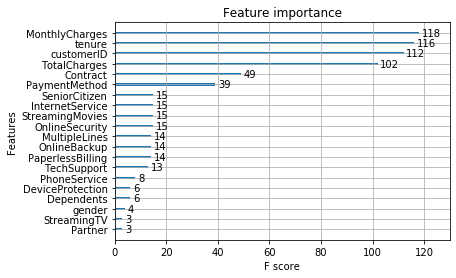

In [47]:
plot_importance(model)

::: Monthly Charges, Tenure and Total Charges are top three features obtained from Xgboost  

## 5. Checking Accuracy of differrent ML Models 

Checking and comparison of Performance of different ML and DNN models. Following algos are implemented 

1. Xgboost
2. Decision Tree Classifier
3. Logistic Regression 
4. Support Vector Machine 
5. Deep Neural Network

### 5.1 Train and Test Sets (70% and 30%) 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### 5.2 Implementation  of XGBOOST Model 

In [31]:
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

In [33]:
print("Accuracy of xgboost: %.2f%%" % (accuracy * 100.0))

Accuracy of xgboost: 79.74%


### 5.3 Implementation of Decision Tree Classifier

In [35]:
model_DTC = DecisionTreeClassifier()
model_DTC = model_DTC.fit(X_train, y_train)

In [36]:
y_pred_dtc = model_DTC.predict(X_test)
predictions_dtc = [round(value) for value in y_pred_dtc]
accuracy_dtc = accuracy_score(y_test, predictions_dtc)
print("Accuracy of Decision Tree Classifier: %.2f%%" % (accuracy_dtc * 100.0))

Accuracy of Decision Tree Classifier: 72.36%


### 5.4 Implementation of Logistic Regression Classifier

In [38]:
model_LR = LogisticRegression()
model_LR = model_LR.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
y_pred_lr = model_LR.predict(X_test)
predictions_lr = [round(value) for value in y_pred_lr]
accuracy_lr = accuracy_score(y_test, predictions_lr)
print("Accuracy of Logistic Regression Classifier: %.2f%%" % (accuracy_lr * 100.0))

Accuracy of Logistic Regression Classifier: 80.31%


### 5.4 Implementation of Support Vector Machine Classifier

In [41]:
model_svm = SVC()
model_svm = model_svm.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
y_pred_svm = model_svm.predict(X_test)
predictions_svm = [round(value) for value in y_pred_svm]
accuracy_svm = accuracy_score(y_test, predictions_svm)
print("Accuracy of Support Vector Machine Classifier: %.2f%%" % (accuracy_svm * 100.0))

Accuracy of Support Vector Machine Classifier: 72.98%


### 5.5 Implementation of K-Nearest Neighbors Classifier

In [44]:
model_knn = KNeighborsClassifier()
model_knn = model_knn.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [45]:
y_pred_knn = model_knn.predict(X_test)
predictions_knn = [round(value) for value in y_pred_knn]
accuracy_knn = accuracy_score(y_test, predictions_knn)
print("Accuracy of K Nearest Neighbor Classifier: %.2f%%" % (accuracy_knn * 100.0))

Accuracy of K Nearest Neighbor Classifier: 73.40%


## 6. Performance Comparison of ML Models  

Among all implemented models -- Logistic Regression Classifier performed best with Accuracy of 80.31%